<a href="https://colab.research.google.com/github/nirmalghimire/DDP_Achievement-Gap/blob/main/Metacognition_Partner_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metacognitive Readign Strategies for 15-Year-Old Students in Non-OECD Countries

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
!pip install pyreadstat #Required to load SPSS (.sav) data
import pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 19.4 MB/s eta 0:00:00


In [ ]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the SAV file into a pandas DataFrame
file_path = '/content/drive/MyDrive/Colab Notebooks/CY07_MSU_STU_QQQ_1.sav'
full_data, metadata = pyreadstat.read_sav(file_path)
print(full_data.head())
print(full_data.dtypes)

   CNTRYID  CNT  CNTSCHID  CNTSTUID  OECD  ST001D01T  ST004D01T  ST153Q01HA  \
0      8.0  ALB  800002.0  800251.0   0.0       10.0        2.0         1.0   
1      8.0  ALB  800002.0  800402.0   0.0       10.0        2.0         1.0   
2      8.0  ALB  800002.0  801902.0   0.0       10.0        1.0         1.0   
3      8.0  ALB  800002.0  803546.0   0.0       10.0        2.0         1.0   
4      8.0  ALB  800002.0  804776.0   0.0       10.0        2.0         1.0   

   ST153Q02HA  ST153Q03HA  ...  PV2READ  PV3READ  PV4READ  PV5READ  PV6READ  \
0         1.0         1.0  ...  366.610  388.501  373.728  354.077  370.415   
1         1.0         1.0  ...  425.045  448.285  433.872  447.108  432.037   
2         1.0         1.0  ...  320.458  346.658  329.878  349.492  328.967   
3         1.0         1.0  ...  417.751  385.422  415.475  376.414  445.205   
4         1.0         1.0  ...  331.580  361.722  364.681  358.006  318.300   

   PV7READ  PV8READ  PV9READ  PV10READ  test  
0  

In [ ]:
# Subsetting the Data
# Create a list of columns to keep
columns_to_keep = [col for col in full_data.columns if col not in full_data.columns[0:4] and col not in full_data.columns[63:76]]

# Create the subset DataFrame
trunc_data = full_data[columns_to_keep]

# Now 'data' contains the subset of your original data
print(trunc_data.dtypes)
print(trunc_data.head())

OECD          float64
ST001D01T     float64
ST004D01T     float64
ST153Q01HA    float64
ST153Q02HA    float64
ST153Q03HA    float64
ST153Q04HA    float64
ST153Q05HA    float64
ST153Q06HA    float64
ST153Q08HA    float64
ST153Q09HA    float64
ST153Q10HA    float64
ST160Q01IA    float64
ST160Q02IA    float64
ST160Q05IA    float64
ST175Q01IA    float64
ST161Q01HA    float64
ST164Q01IA    float64
ST164Q02IA    float64
ST164Q03IA    float64
ST164Q04IA    float64
ST164Q05IA    float64
ST164Q06IA    float64
ST165Q01IA    float64
ST165Q02IA    float64
ST165Q03IA    float64
ST165Q04IA    float64
ST165Q05IA    float64
ST166Q01HA    float64
ST166Q02HA    float64
ST166Q03HA    float64
ST166Q04HA    float64
ST166Q05HA    float64
ST182Q03HA    float64
ST182Q04HA    float64
ST208Q01HA    float64
ST208Q02HA    float64
ST208Q04HA    float64
GRADE         float64
MISCED        float64
FISCED        float64
HISEI         float64
DURECEC       float64
REPEAT        float64
TMINS         float64
ESCS      

In [ ]:
# For partner countries
partner_data = trunc_data[trunc_data['OECD'] == 0.0]
partner_data.shape

(317477, 59)

In [ ]:
# Summary of the Variables
print(partner_data.describe())

           OECD      ST001D01T      ST004D01T     ST153Q01HA     ST153Q02HA  \
count  317477.0  317477.000000  317477.000000  292176.000000  290478.000000   
mean        0.0      10.152761       1.501432       1.281700       1.229384   
std         0.0       6.748746       0.499999       0.449829       0.420437   
min         0.0       7.000000       1.000000       1.000000       1.000000   
25%         0.0       9.000000       1.000000       1.000000       1.000000   
50%         0.0      10.000000       2.000000       1.000000       1.000000   
75%         0.0      10.000000       2.000000       2.000000       1.000000   
max         0.0      96.000000       2.000000       2.000000       2.000000   

          ST153Q03HA     ST153Q04HA     ST153Q05HA     ST153Q06HA  \
count  289795.000000  290173.000000  290020.000000  288915.000000   
mean        1.355738       1.222288       1.146497       1.468165   
std         0.478737       0.415784       0.353604       0.498986   
min         

In [ ]:
# Impute data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
imputed_data = imputer.fit_transform(partner_data)
data = pd.DataFrame(imputed_data, columns=partner_data.columns)
print(data.describe())

           OECD      ST001D01T      ST004D01T     ST153Q01HA     ST153Q02HA  \
count  317477.0  317477.000000  317477.000000  317477.000000  317477.000000   
mean        0.0      10.152761       1.501432       1.281700       1.229384   
std         0.0       6.748746       0.499999       0.431532       0.402163   
min         0.0       7.000000       1.000000       1.000000       1.000000   
25%         0.0       9.000000       1.000000       1.000000       1.000000   
50%         0.0      10.000000       2.000000       1.000000       1.000000   
75%         0.0      10.000000       2.000000       2.000000       1.229384   
max         0.0      96.000000       2.000000       2.000000       2.000000   

          ST153Q03HA     ST153Q04HA     ST153Q05HA     ST153Q06HA  \
count  317477.000000  317477.000000  317477.000000  317477.000000   
mean        1.355738       1.222288       1.146497       1.468165   
std         0.457390       0.397503       0.337968       0.476012   
min         

In [ ]:
# Separate the features (X) and the target variable (y)
X = data.drop(columns=['UNDREM', 'METASUM', 'METASPAM'])
y_undrem = data['UNDREM']
y_metasum = data['METASUM']
y_metaspam = data['METASPAM']

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
X_train, X_test, y_undrem_train, y_undrem_test, y_metasum_train, y_metasum_test, y_metaspam_train, y_metaspam_test = train_test_split(
    X, y_undrem, y_metasum, y_metaspam, test_size=0.3, random_state=42)

In [ ]:
# Create and train the random forest models
# A. Meta-cognition of Reading: Understanding and Remembering
model_undrem = RandomForestRegressor(n_estimators=100)
model_undrem.fit(X_train, y_undrem_train)

RandomForestRegressor()

In [ ]:
# B. Meta-cognition of Reading: Summarizing
model_metasum = RandomForestRegressor(n_estimators=100)
model_metasum.fit(X_train, y_metasum_train)

RandomForestRegressor()

In [ ]:
# C. Meta-cognition of Reading: Assessing Credibility
model_metaspam = RandomForestRegressor(n_estimators=100)
model_metaspam.fit(X_train, y_metaspam_train)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Make predictions on the test data
undrem_predictions = model_undrem.predict(X_test)
metasum_predictions = model_metasum.predict(X_test)
metaspam_predictions = model_metaspam.predict(X_test)

In [ ]:
# Calculate and print performance metrics for training data
def print_metrics(model, X, y, dataset_type):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)
    r2 = r2_score(y, predictions)

    print(f"{dataset_type} - Mean Squared Error for Partner Countries: {mse}")
    print(f"{dataset_type} - Mean Absolute Error for Partner Countries: {mae}")
    print(f"{dataset_type} - R-squared Score for Partner Countries: {r2}")

# For UNDREM model
print("UNDREM Model:")
print_metrics(model_undrem, X_train, y_undrem_train, "Training")
print_metrics(model_undrem, X_test, y_undrem_test, "Test")

# For METASUM model
print("\nMETASUM Model:")
print_metrics(model_metasum, X_train, y_metasum_train, "Training")
print_metrics(model_metasum, X_test, y_metasum_test, "Test")

# For METASPAM model
print("\nMETASPAM Model:")
print_metrics(model_metaspam, X_train, y_metaspam_train, "Training")
print_metrics(model_metaspam, X_test, y_metaspam_test, "Test")

UNDREM Model:
Training - Mean Squared Error for Partner Countries: 0.001394786538388172
Training - Mean Absolute Error for Partner Countries: 0.011446592959464335
Training - R-squared Score for Partner Countries: 0.9983436434080378
Test - Mean Squared Error for Partner Countries: 0.010295794902850134
Test - Mean Absolute Error for Partner Countries: 0.031202160714259637
Test - R-squared Score for Partner Countries: 0.9877735377170873

METASUM Model:
Training - Mean Squared Error for Partner Countries: 0.00046781065330120733
Training - Mean Absolute Error for Partner Countries: 0.0038751936907716563
Training - R-squared Score for Partner Countries: 0.9994328592398317
Test - Mean Squared Error for Partner Countries: 0.003551483631163043
Test - Mean Absolute Error for Partner Countries: 0.010359492945486177
Test - R-squared Score for Partner Countries: 0.9956742863045758

METASPAM Model:
Training - Mean Squared Error for Partner Countries: 0.00039675858741561684
Training - Mean Absolute E

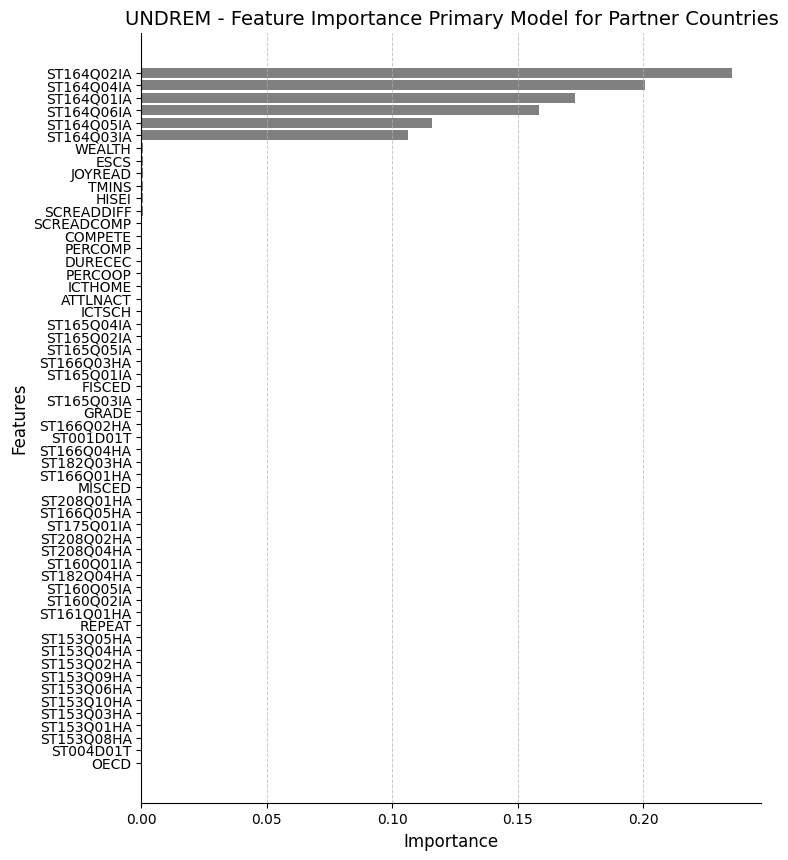

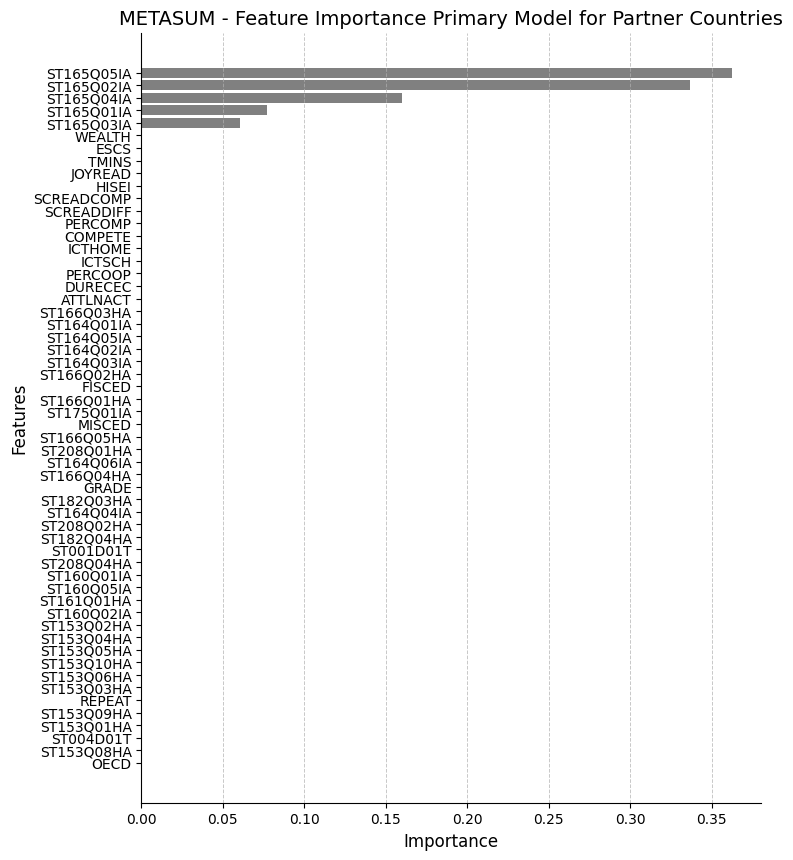

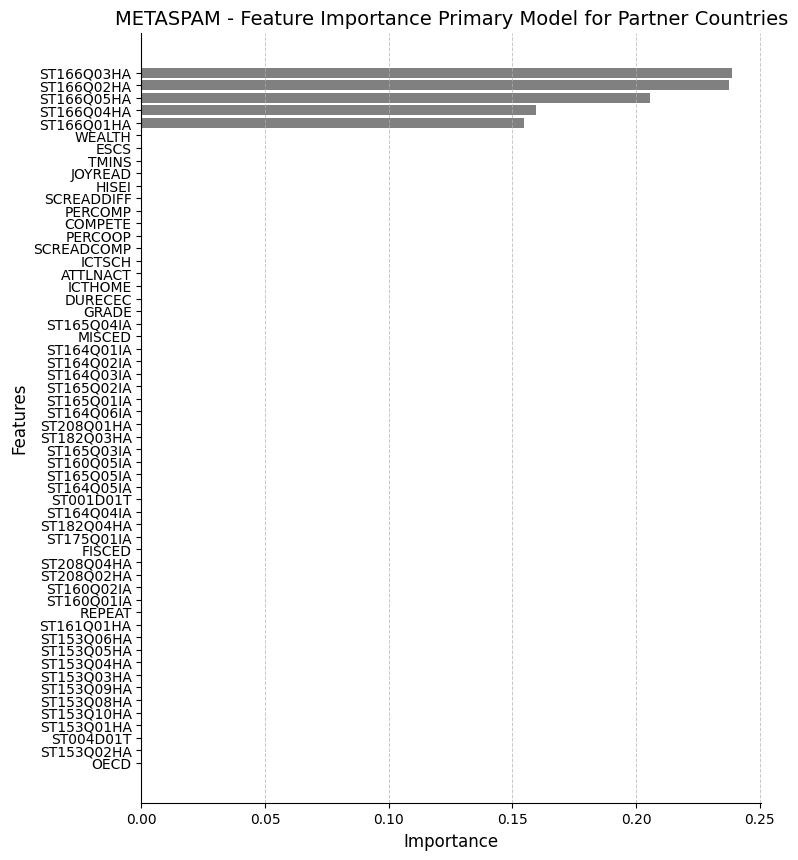

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot feature importances and save as .png
def plot_feature_importance(importances, feature_names, model_name):
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

    plt.figure(figsize=(8, 10))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='grey')

    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title(f'{model_name} - Feature Importance Primary Model for Partner Countries', fontsize=14)

    plt.yticks(fontsize=10)

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.grid(axis='x', linestyle='--', alpha=0.7, linewidth=0.7)

    # Save the plot as a .png file with 600 dpi and tight bounding box
    plt.savefig(f'{model_name.lower()}_feature_importance_all_primary.png', dpi=600, bbox_inches='tight')

    plt.show()

# Get feature importances from the models
undrem_feature_importances = model_undrem.feature_importances_
metasum_feature_importances = model_metasum.feature_importances_
metaspam_feature_importances = model_metaspam.feature_importances_

# Assuming X.columns gives you the feature names, call the function for each model
plot_feature_importance(undrem_feature_importances, X.columns, 'UNDREM')
plot_feature_importance(metasum_feature_importances, X.columns, 'METASUM')
plot_feature_importance(metaspam_feature_importances, X.columns, 'METASPAM')

In [ ]:
# Create a DataFrame to hold the feature importance values for the UNDREM model
feature_importance_undrem_df = pd.DataFrame({'Feature': X.columns, 'Importance': undrem_feature_importances})

# Sort the DataFrame by the 'Importance' column in ascending order
feature_importance_undrem_df = feature_importance_undrem_df.sort_values(by='Importance', ascending=True)

# Print the sorted DataFrame
print(feature_importance_undrem_df)

       Feature  Importance
0         OECD    0.000000
2    ST004D01T    0.000045
9   ST153Q08HA    0.000046
3   ST153Q01HA    0.000047
5   ST153Q03HA    0.000049
11  ST153Q10HA    0.000050
8   ST153Q06HA    0.000052
10  ST153Q09HA    0.000058
4   ST153Q02HA    0.000060
6   ST153Q04HA    0.000061
7   ST153Q05HA    0.000064
43      REPEAT    0.000082
16  ST161Q01HA    0.000101
13  ST160Q02IA    0.000109
14  ST160Q05IA    0.000131
34  ST182Q04HA    0.000135
12  ST160Q01IA    0.000137
37  ST208Q04HA    0.000145
36  ST208Q02HA    0.000145
15  ST175Q01IA    0.000157
32  ST166Q05HA    0.000160
35  ST208Q01HA    0.000164
39      MISCED    0.000168
28  ST166Q01HA    0.000168
33  ST182Q03HA    0.000172
31  ST166Q04HA    0.000173
1    ST001D01T    0.000173
29  ST166Q02HA    0.000173
38       GRADE    0.000178
25  ST165Q03IA    0.000184
40      FISCED    0.000185
23  ST165Q01IA    0.000193
30  ST166Q03HA    0.000207
27  ST165Q05IA    0.000213
24  ST165Q02IA    0.000217
26  ST165Q04IA    0.000218
4

In [ ]:
feature_importance_msum_df = pd.DataFrame({'Feature': X.columns, 'Importance': metasum_feature_importances})
feature_importance_msum_df = feature_importance_msum_df.sort_values(by='Importance', ascending=True)
print(feature_importance_msum_df)

       Feature  Importance
0         OECD    0.000000
9   ST153Q08HA    0.000013
2    ST004D01T    0.000015
3   ST153Q01HA    0.000016
10  ST153Q09HA    0.000016
43      REPEAT    0.000018
5   ST153Q03HA    0.000020
8   ST153Q06HA    0.000020
11  ST153Q10HA    0.000021
7   ST153Q05HA    0.000024
6   ST153Q04HA    0.000024
4   ST153Q02HA    0.000026
13  ST160Q02IA    0.000033
16  ST161Q01HA    0.000034
14  ST160Q05IA    0.000036
12  ST160Q01IA    0.000041
37  ST208Q04HA    0.000045
1    ST001D01T    0.000050
34  ST182Q04HA    0.000051
36  ST208Q02HA    0.000052
20  ST164Q04IA    0.000054
33  ST182Q03HA    0.000055
38       GRADE    0.000055
31  ST166Q04HA    0.000058
22  ST164Q06IA    0.000059
35  ST208Q01HA    0.000059
32  ST166Q05HA    0.000059
39      MISCED    0.000060
15  ST175Q01IA    0.000061
28  ST166Q01HA    0.000061
40      FISCED    0.000065
29  ST166Q02HA    0.000066
19  ST164Q03IA    0.000073
18  ST164Q02IA    0.000073
21  ST164Q05IA    0.000074
17  ST164Q01IA    0.000078
3

In [ ]:
feature_importance_mspam_df = pd.DataFrame({'Feature': X.columns, 'Importance': metaspam_feature_importances})
feature_importance_mspam_df = feature_importance_mspam_df.sort_values(by='Importance', ascending=True)
print(feature_importance_mspam_df)

       Feature  Importance
0         OECD    0.000000
4   ST153Q02HA    0.000013
2    ST004D01T    0.000015
3   ST153Q01HA    0.000015
11  ST153Q10HA    0.000016
9   ST153Q08HA    0.000016
10  ST153Q09HA    0.000018
5   ST153Q03HA    0.000020
6   ST153Q04HA    0.000020
7   ST153Q05HA    0.000022
8   ST153Q06HA    0.000022
16  ST161Q01HA    0.000028
43      REPEAT    0.000031
12  ST160Q01IA    0.000034
13  ST160Q02IA    0.000037
36  ST208Q02HA    0.000042
37  ST208Q04HA    0.000045
40      FISCED    0.000046
15  ST175Q01IA    0.000047
34  ST182Q04HA    0.000056
20  ST164Q04IA    0.000057
1    ST001D01T    0.000057
21  ST164Q05IA    0.000057
27  ST165Q05IA    0.000057
14  ST160Q05IA    0.000057
25  ST165Q03IA    0.000058
33  ST182Q03HA    0.000059
35  ST208Q01HA    0.000059
22  ST164Q06IA    0.000063
23  ST165Q01IA    0.000065
24  ST165Q02IA    0.000065
19  ST164Q03IA    0.000069
18  ST164Q02IA    0.000071
17  ST164Q01IA    0.000072
39      MISCED    0.000073
26  ST165Q04IA    0.000079
3

# Testing the impact of non-cognitive variables

In [ ]:
# Remove Direct Impact Variables
columns_to_remove = ['ST164Q01IA', 'ST164Q02IA', 'ST164Q03IA', 'ST164Q04IA', 'ST164Q05IA', 'ST164Q06IA', 'ST165Q01IA', 'ST165Q02IA', 'ST165Q03IA', 'ST165Q04IA', 'ST165Q05IA', 'ST166Q01HA', 'ST166Q02HA', 'ST166Q03HA', 'ST166Q04HA', 'ST166Q05HA']
X_train_new = X_train.drop(columns=columns_to_remove)

In [ ]:
# Train New Models
# A. Meta-cognition of Reading: Understanding and Remembering
model_undrem_new = RandomForestRegressor(n_estimators=100)
model_undrem_new.fit(X_train_new, y_undrem_train)

RandomForestRegressor()

In [ ]:
# B. Meta-cognition of Reading: Summarizing
model_metasum_new = RandomForestRegressor(n_estimators=100)
model_metasum_new.fit(X_train_new, y_metasum_train)

RandomForestRegressor()

In [ ]:
# C. Meta-cognition of Reading: Assessing Credibility
model_metaspam_new = RandomForestRegressor(n_estimators=100)
model_metaspam_new.fit(X_train_new, y_metaspam_train)

RandomForestRegressor()

In [ ]:
# Validitaning Using Test Set
X_test_new = X_test.drop(columns=columns_to_remove)
y_undrem_pred_test_new = model_undrem_new.predict(X_test_new)
y_metasum_pred_test_new = model_metasum_new.predict(X_test_new)
y_metaspam_pred_test_new = model_undrem_new.predict(X_test_new)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to print performance metrics
def print_metrics(model, X, y, dataset_type):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)
    r2 = r2_score(y, predictions)

    print(f"{dataset_type} - Noncognitive Model: Mean Squared Error for Partner Countries: {mse}")
    print(f"{dataset_type} - Noncognitive Model: Mean Absolute Error for Partner Countries: {mae}")
    print(f"{dataset_type} - Noncognitive Model: R-squared Score for Partner Countries: {r2}")

# Calculate and print performance metrics for new models
print("New UNDREM Model:")
print_metrics(model_undrem_new, X_test_new, y_undrem_test, "Test")

print("\nNew METASUM Model:")
print_metrics(model_metasum_new, X_test_new, y_metasum_test, "Test")

print("\nNew METASPAM Model:")
print_metrics(model_metaspam_new, X_test_new, y_metaspam_test, "Test")

New UNDREM Model:
Test - Noncognitive Model: Mean Squared Error for Partner Countries: 0.7291108855827462
Test - Noncognitive Model: Mean Absolute Error for Partner Countries: 0.6749246174767362
Test - Noncognitive Model: R-squared Score for Partner Countries: 0.13416624682657674

New METASUM Model:
Test - Noncognitive Model: Mean Squared Error for Partner Countries: 0.6955571550035136
Test - Noncognitive Model: Mean Absolute Error for Partner Countries: 0.661140987321274
Test - Noncognitive Model: R-squared Score for Partner Countries: 0.15281008619947756

New METASPAM Model:
Test - Noncognitive Model: Mean Squared Error for Partner Countries: 0.6605366649240357
Test - Noncognitive Model: Mean Absolute Error for Partner Countries: 0.6474980765403872
Test - Noncognitive Model: R-squared Score for Partner Countries: 0.12547897294001553


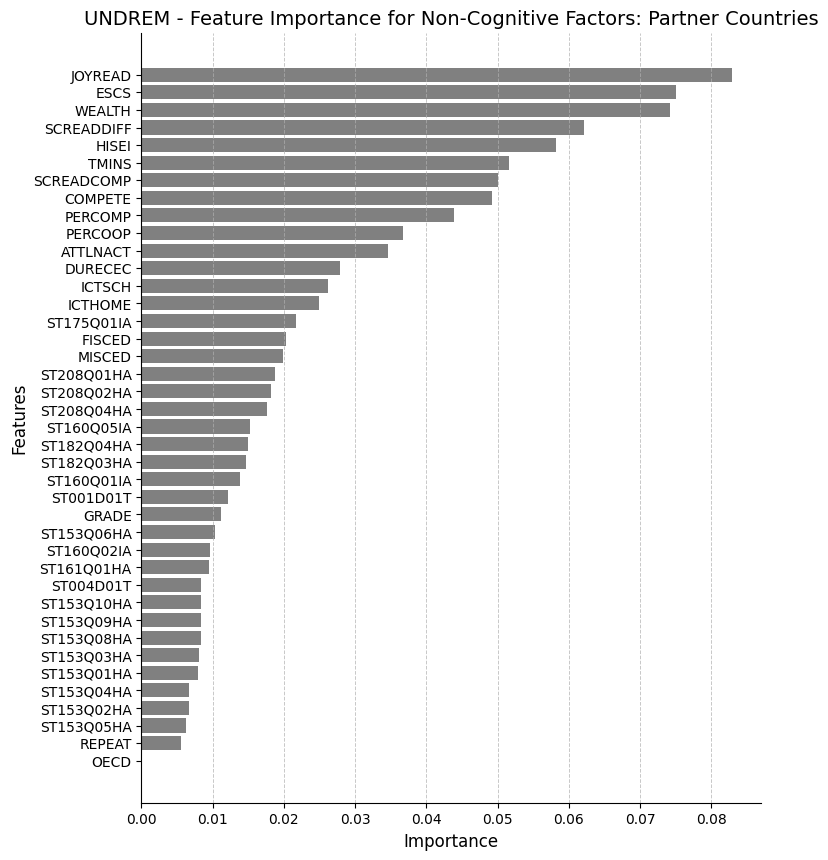

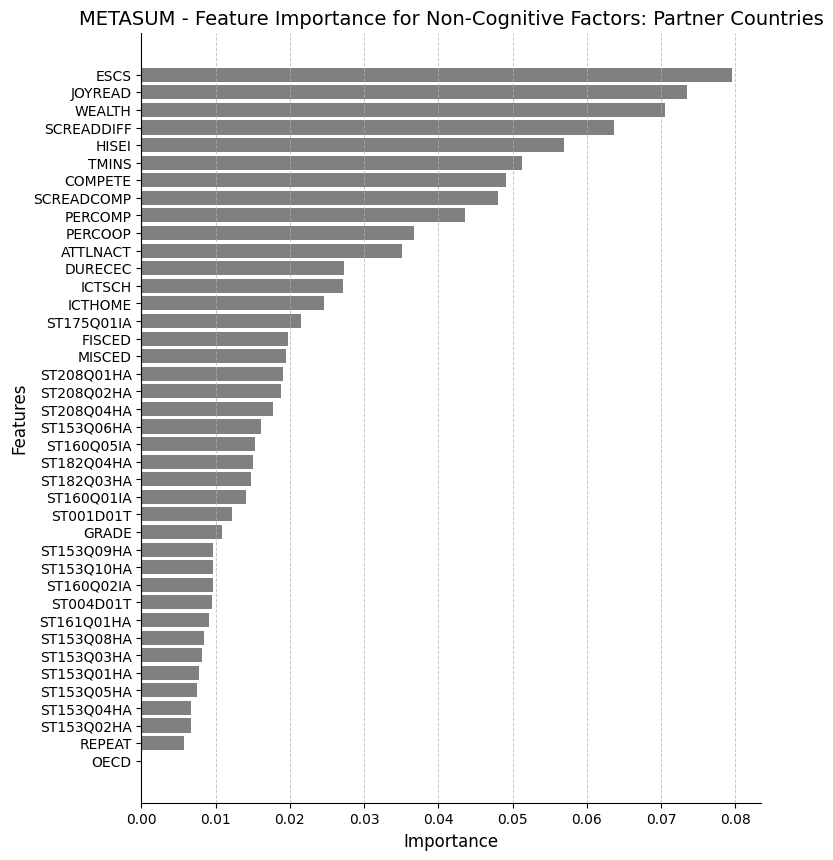

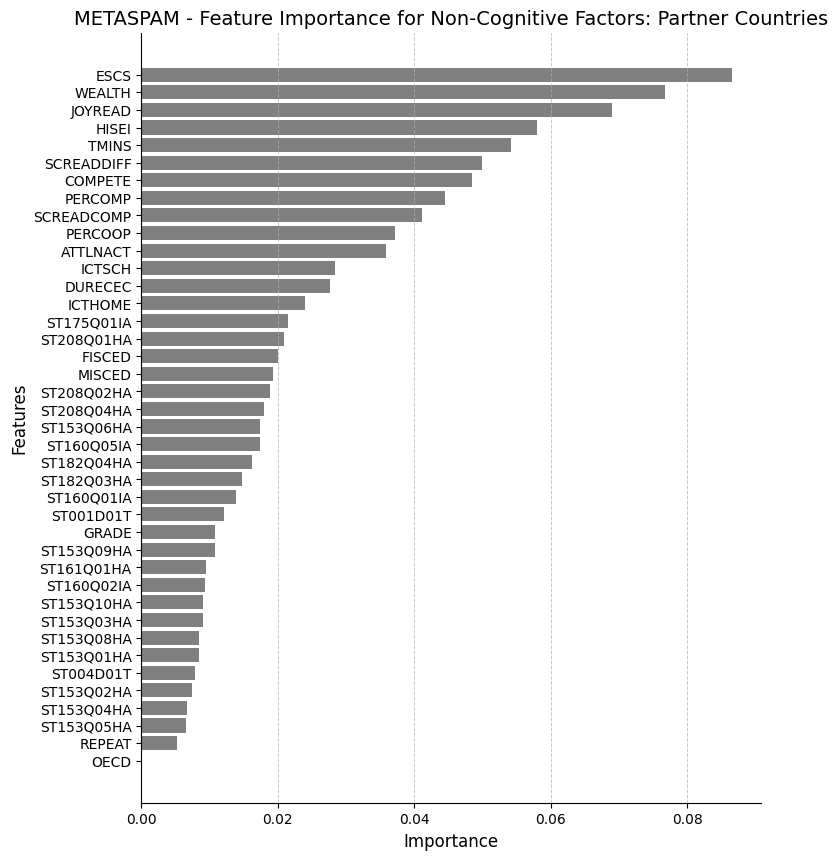

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot feature importances and save as .png
def plot_feature_importance(importances, feature_names, model_name):
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

    plt.figure(figsize=(8, 10))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='grey')

    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title(f'{model_name} - Feature Importance for Non-Cognitive Factors: Partner Countries', fontsize=14)

    plt.yticks(fontsize=10)

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.grid(axis='x', linestyle='--', alpha=0.7, linewidth=0.7)

    # Save the plot as a .png file with 600 dpi and tight bounding box
    plt.savefig(f'{model_name.lower()}_feature_importance_non_cognitive_partner_countries.png', dpi=600, bbox_inches='tight')

    plt.show()

# Get feature importances from the new models
undrem_feature_importances_new = model_undrem_new.feature_importances_
metasum_feature_importances_new = model_metasum_new.feature_importances_
metaspam_feature_importances_new = model_metaspam_new.feature_importances_

# Assuming X_train_new.columns gives you the feature names, call the function for each new model
plot_feature_importance(undrem_feature_importances_new, X_train_new.columns, 'UNDREM')
plot_feature_importance(metasum_feature_importances_new, X_train_new.columns, 'METASUM')
plot_feature_importance(metaspam_feature_importances_new, X_train_new.columns, 'METASPAM')

In [ ]:
# Function to print feature importances
def print_feature_importance(importances, feature_names, model_name):
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print(f"Feature Importance for {model_name}")
    print("---------------------------------------")
    print(feature_importance_df)
    print("\n")

# Get feature importances from the new models
undrem_feature_importances_new = model_undrem_new.feature_importances_
metasum_feature_importances_new = model_metasum_new.feature_importances_
metaspam_feature_importances_new = model_metaspam_new.feature_importances_

# Assuming X_train_new.columns gives you the feature names, call the function for each new model
print_feature_importance(undrem_feature_importances_new, X_train_new.columns, 'New UNDREM')
print_feature_importance(metasum_feature_importances_new, X_train_new.columns, 'New METASUM')
print_feature_importance(metaspam_feature_importances_new, X_train_new.columns, 'New METASPAM')

Feature Importance for New UNDREM
---------------------------------------
       Feature  Importance
33     JOYREAD    0.082868
29        ESCS    0.075023
32      WEALTH    0.074145
35  SCREADDIFF    0.062098
25       HISEI    0.058255
28       TMINS    0.051521
34  SCREADCOMP    0.050056
39     COMPETE    0.049272
36     PERCOMP    0.043814
37     PERCOOP    0.036696
38    ATTLNACT    0.034607
26     DURECEC    0.027920
31      ICTSCH    0.026174
30     ICTHOME    0.024862
15  ST175Q01IA    0.021736
24      FISCED    0.020229
23      MISCED    0.019939
19  ST208Q01HA    0.018760
20  ST208Q02HA    0.018203
21  ST208Q04HA    0.017645
14  ST160Q05IA    0.015196
18  ST182Q04HA    0.014896
17  ST182Q03HA    0.014709
12  ST160Q01IA    0.013830
1    ST001D01T    0.012144
22       GRADE    0.011185
8   ST153Q06HA    0.010310
13  ST160Q02IA    0.009673
16  ST161Q01HA    0.009463
2    ST004D01T    0.008405
11  ST153Q10HA    0.008401
10  ST153Q09HA    0.008343
9   ST153Q08HA    0.008334
5   ST15